In [24]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Charger les données
data = pd.read_csv('weather_data_transformed.csv')

# Convertir la colonne 'Date' en type datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extraire le mois et l'année
data['Month'] = data['Date'].dt.to_period('M')

# Afficher les premières lignes pour vérifier
print(data[['Date', 'Month']].head())


                 Date    Month
0 2023-01-01 12:00:00  2023-01
1 2023-01-01 21:00:00  2023-01
2 2023-01-02 04:00:00  2023-01
3 2023-01-03 00:00:00  2023-01
4 2023-01-03 10:00:00  2023-01


In [20]:
monthly_data = data.groupby('Month').agg({
    'Temperature': 'mean',
    'Precipitation': 'sum',
    'Humidity': 'mean'
}).reset_index()

print(monthly_data)


      Month  Temperature  Precipitation   Humidity
0   2023-01    14.002381            130  56.803571
1   2023-02    20.215789            235  63.349474
2   2023-03    24.419767            130  67.952326
3   2023-04    24.206667            185  70.170667
4   2023-05    21.420000            160  65.916250
5   2023-06    14.257447            165  55.691489
6   2023-07     6.655882             95  45.556863
7   2023-08     0.093506            135  37.857143
8   2023-09    -4.170968            145  34.756452
9   2023-10    -4.709302            160  34.126744
10  2023-11    -0.275325            190  38.245455
11  2023-12     5.901220            110  45.139024


In [21]:
max_precipitation_month = monthly_data.loc[monthly_data['Precipitation'].idxmax()]
print(max_precipitation_month)

Month              2023-02
Temperature      20.215789
Precipitation          235
Humidity         63.349474
Name: 1, dtype: object


Février est le mois avec le plus de précipitation

In [26]:
max_temperature_month = monthly_data.loc[monthly_data['Temperature'].idxmax()]
print(max_temperature_month)


Month              2023-03
Temperature      24.419767
Precipitation          130
Humidity         67.952326
Name: 2, dtype: object


Mars est le mois avec la plus grande température

In [27]:
max_humidity_month = monthly_data.loc[monthly_data['Humidity'].idxmax()]
print(max_temperature_month)


Month              2023-03
Temperature      24.419767
Precipitation          130
Humidity         67.952326
Name: 2, dtype: object


Mars est le mois avec la plus grande Humidité

In [26]:
print(monthly_data['Humidity'].describe())

count    12.000000
mean     51.297121
std      13.593058
min      34.126744
25%      38.148377
50%      50.624176
75%      63.991168
max      70.170667
Name: Humidity, dtype: float64


Les températures suivent une tendance saisonnière logique

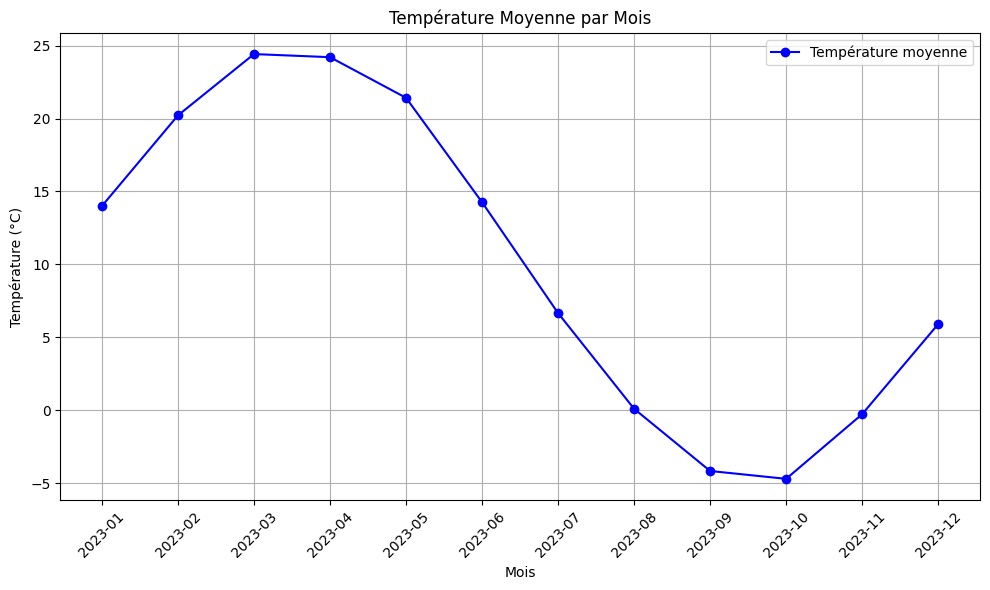

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['Temperature'], marker='o', color='b', label='Température moyenne')
plt.title('Température Moyenne par Mois')
plt.xlabel('Mois')
plt.ylabel('Température (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


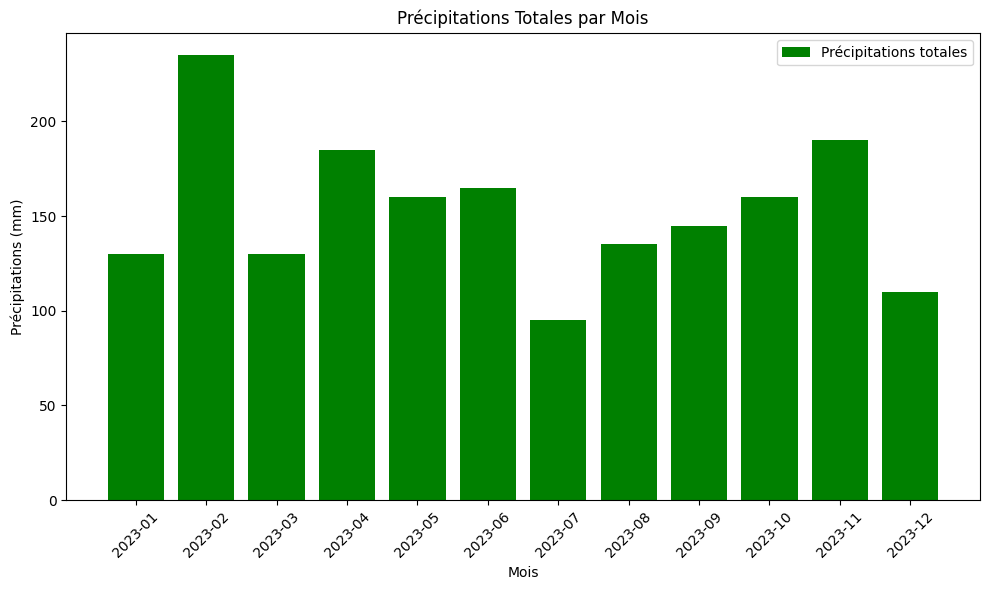

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_data['Month'].astype(str), monthly_data['Precipitation'], color='g', label='Précipitations totales')
plt.title('Précipitations Totales par Mois')
plt.xlabel('Mois')
plt.ylabel('Précipitations (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


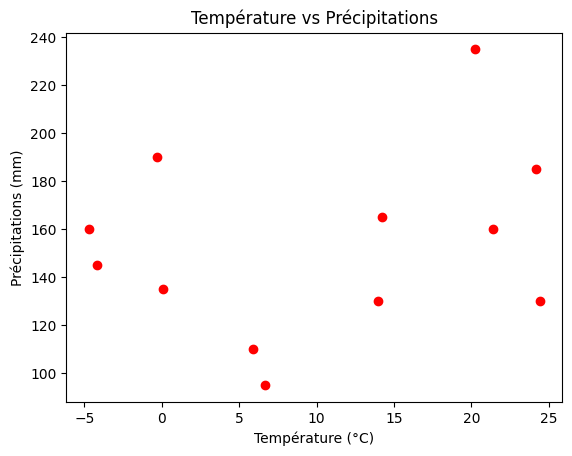

In [31]:
plt.scatter(monthly_data['Temperature'], monthly_data['Precipitation'], color='r')
plt.title('Température vs Précipitations')
plt.xlabel('Température (°C)')
plt.ylabel('Précipitations (mm)')
plt.show()


Observez-vous une corrélation entre précipitations et température ?
les températures baissent selon le taux de précipitation et vice versa

In [11]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Température Moyenne par Mois', 'Précipitations Totales par Mois'))

# Ajouter la courbe des températures
fig.add_trace(go.Scatter(
    x=monthly_data['Month'].astype(str),  # Mois
    y=monthly_data['Temperature'],  # Température moyenne
    mode='lines+markers',  # Afficher la courbe avec des points
    name='Température',
    line=dict(color='blue')
), row=1, col=1)

# Ajouter l'histogramme des précipitations
fig.add_trace(go.Bar(
    x=monthly_data['Month'].astype(str),  # Mois
    y=monthly_data['Precipitation'],  # Précipitations totales
    name='Précipitations',
    marker=dict(color='cyan')
), row=1, col=2)

# Mettre à jour les titres et les étiquettes
fig.update_layout(
    title='Analyse des Tendances Climatiques Mensuelles',
    xaxis_title='Mois',
    yaxis_title='Température (°C)',
    xaxis2_title='Mois',
    yaxis2_title='Précipitations (mm)',
    showlegend=True,
    template='plotly_dark',  # Optionnel : style sombre pour l'interface
    height=600,  # Hauteur du graphique
    width=1200   # Largeur du graphique
)

# Afficher le graphique interactif
fig.show()

# le graph s'affiche en notebook si ça fonctionne pas en /lab/tree

• Quels mois présentent à la fois des températures 
élevées et de fortes précipitations ?
Février

• Les mois les plus secs (faibles précipitations) 
sont-ils aussi les plus froids ?
Juillet, non il y'as des mois qui sont encore plus froids